
## *This is a group effort by Sara Rostami, Keyhan Rayati and Mohammad Oladian*

# mount your google drive in colab

In [1]:
from google.colab import drive
drive.mount('/gdrive')

%cd /gdrive/MyDrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive


# Download [requirment files](https://drive.google.com/file/d/1KXhBxmKGjrZN_FJrX2YYXmT-ONPPlYC5/view) to your google driver

* open link and save compressed file to your google drive (click **add to drive** on right corner of the page)
* choose your data path
* default data path is /gdrive/MyDrive/mri

In [2]:
data_path = '/gdrive/MyDrive/mri'

!7z x '{data_path}/Ex04_fMRI_requirement.7z' -o/gdrive/MyDrive/mri


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /gdrive/MyDrive/mri/                              1 file, 507079453 bytes (484 MiB)

Extracting archive: /gdrive/MyDrive/mri/Ex04_fMRI_requirement.7z
--
Path = /gdrive/MyDrive/mri/Ex04_fMRI_requirement.7z
Type = 7z
Physical Size = 507079453
Headers Size = 558
Method = LZMA2:24
Solid = +
Blocks = 1

  0%    
Would you like to replace the existing file:
  Path:     /gdrive/MyDrive/mri/ANTs-28-03-2019.7z
  Size:     315597527 bytes (301 MiB)
  Modified: 2022-05-04 13:36:04
with the file from archive:
  Path:     ANTs-28-03-2019.7z
  Size:     315597527 bytes (301 MiB)
  Modified: 2022-05-04 13:36:04
? (Y)es / (N)o / (A)lways / (S)kip all / A(u)to rename all / (Q)uit? S

  0% . ANTs-28-

# Extract and add pre-build [ANTs](https://github.com/ANTsX/ANTs) (Advanced Normalization Tools) to enviroment

## Caution : **Don't change "ANTs_PATH"**


In [3]:
import os

%cd /gdrive/MyDrive/mri

ANTs_PATH = '/gdrive/MyDrive/ANTs'

!mkdir -p $ANTs_PATH


!7z x ANTs-28-03-2019.7z -o/gdrive/MyDrive/ANTs -y
os.environ['PATH'] += f":{ANTs_PATH}/bin"
!chmod +x $ANTs/bin*

/gdrive/MyDrive/mri

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 315597527 bytes (301 MiB)

Extracting archive: ANTs-28-03-2019.7z
--
Path = ANTs-28-03-2019.7z
Type = 7z
Physical Size = 315597527
Headers Size = 2380
Method = LZMA2:24 BCJ
Solid = +
Blocks = 1

  0%      0% 1 - bin/ANTS                   1% 1 - bin/ANTS                   1% 2 - bin/ANTSIntegrateVectorField                                       2% 2 - bin/ANTSIntegrateVectorField                                       2% 3 - bin/ANTSIntegrateVelocityField

### check ANTs works or not.
### if it works you sould see something like this line :
### *Usage: ResampleImage imageDimension inputImage outputImage MxNxO*


In [4]:
!ResampleImage 

Usage: ResampleImage imageDimension inputImage outputImage MxNxO [size=1,spacing=0] [interpolate type] [pixeltype]
  Interpolation type: 
    0. linear (default)
    1. nn 
    2. gaussian [sigma=imageSpacing] [alpha=1.0]
    3. windowedSinc [type = 'c'osine, 'w'elch, 'b'lackman, 'l'anczos, 'h'amming]
    4. B-Spline [order=3]
 pixeltype  :  TYPE 
  0  :  char   
  1  :  unsigned char   
  2  :  short   
  3  :  unsigned short   
  4  :  int   
  5  :  unsigned int   
  6  :  float (default)  
  7  :  double  


### Plot function

In [5]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import color

def plot_mp_mri(mri,mask=None, slice_num = [40,40,50],bold = False,time = None):
  

  plt.style.context('dark_background')
  rot = lambda img : ndimage.rotate(img,90)
  if mask is None :
    f = plt.figure(figsize = (16,8))
    f.patch.set_facecolor('black')
    ax = plt.subplot(131)
    ax.imshow(ndimage.rotate(mri[slice_num[0],:,:],90),cmap = 'gray')
    ax.axis("off")
    ax.set_title(f'X={slice_num[0]}',color= 'white',loc = 'left')

    ax1 = plt.subplot(132)
    ax1.imshow(rot(mri[:,slice_num[1],:]),cmap = 'gray')
    ax1.axis("off")
    ax1.set_title(f'Y={slice_num[1]}',color= 'white',loc = 'left')
    
    ax2 = plt.subplot(133)
    ax2.imshow(rot(mri[:,:,slice_num[2]]),cmap = 'gray')
    ax2.axis("off")
    ax2.set_title(f'Z={slice_num[2]}',color= 'white',loc = 'left')

    plt.show()
 
  else:
    if bold:
      f = plt.figure(figsize = (16,8))
      f.patch.set_facecolor('black')
      ct = mask[:,:,:,time]

      ax = plt.subplot(131)
      ax.imshow(rot(mri[slice_num[0],:,:]),cmap = 'gray')
      ax.imshow(rot(ct[slice_num[0],:,:]),alpha = .3,cmap = 'hot')
      ax.axis("off")
      ax.set_title(f'X={slice_num[0]}',color= 'white',loc = 'left')    

      ax1 = plt.subplot(132)
      ax1.imshow(rot(mri[:,slice_num[1],:]),cmap = 'gray')
      ax1.imshow(rot(ct[:,slice_num[1],:]),alpha = .3,cmap = 'hot')
      ax1.axis("off")
      ax1.set_title(f'Y={slice_num[1]}',color= 'white',loc = 'left')

      ax2 = plt.subplot(133)
      ax2.imshow(rot(mri[:,:,slice_num[2]]),cmap = 'gray')
      ax2.imshow(rot(ct[:,:,slice_num[2]]),alpha = .3,cmap = 'hot')
      ax2.axis("off")
      ax2.set_title(f'Z={slice_num[2]}',color= 'white',loc = 'left')

      plt.show()
    else:
      f = plt.figure(figsize = (16,8))
      f.patch.set_facecolor('black')
      ct = color.label2rgb(mask, bg_label=0)

      ax = plt.subplot(131)
      ax.imshow(rot(mri[slice_num[0],:,:]),cmap = 'gray')
      ax.imshow(rot(ct[slice_num[0],:,:,:]),alpha = .3)
      ax.axis("off")
      ax.set_title(f'X={slice_num[0]}',color= 'white',loc = 'left')    

      ax1 = plt.subplot(132)
      ax1.imshow(rot(mri[:,slice_num[1],:]),cmap = 'gray')
      ax1.imshow(rot(ct[:,slice_num[1],:,:]),alpha = .3)
      ax1.axis("off")
      ax1.set_title(f'Y={slice_num[1]}',color= 'white',loc = 'left')

      ax2 = plt.subplot(133)
      ax2.imshow(rot(mri[:,:,slice_num[2]]),cmap = 'gray')
      ax2.imshow(rot(ct[:,:,slice_num[2],:]),alpha = .3)
      ax2.axis("off")
      ax2.set_title(f'Z={slice_num[2]}',color= 'white',loc = 'left')

      plt.show()

#plot T1 image and MNI152 images

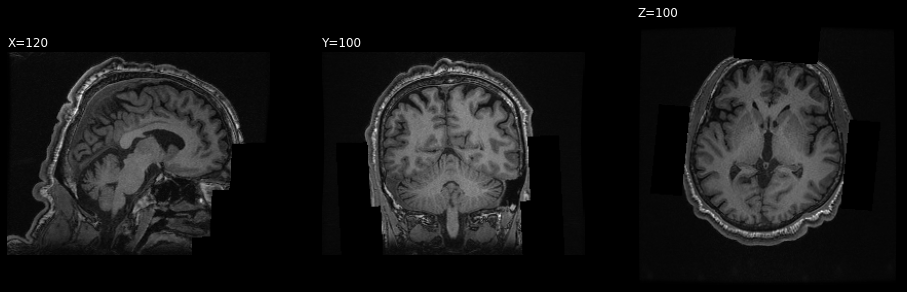

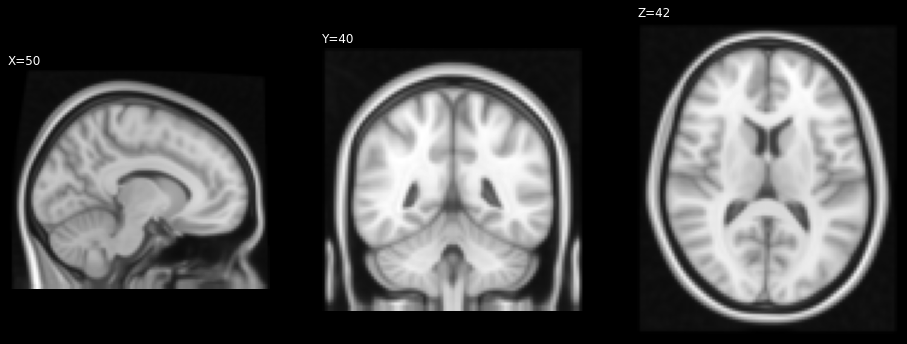

In [6]:
template = nib.load(data_path + '/MNI152_T1_2mm.nii.gz')
T1 = nib.load(data_path +  '/T1w.nii.gz')
temp_mask = nib.load( data_path + '/MNI152_T1_2mm_brain_mask.nii.gz')

plot_mp_mri(T1.get_fdata(),slice_num=[120,100,100])
plot_mp_mri(template.get_fdata(),slice_num=[50,40,42])

## Know we plot MNI152 template image with brain mask file then we do this with T1w image and template mask.
### as you can see T1w and Template brain mask are not aligned together so, we will register T1w image to tmplate image in next level.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


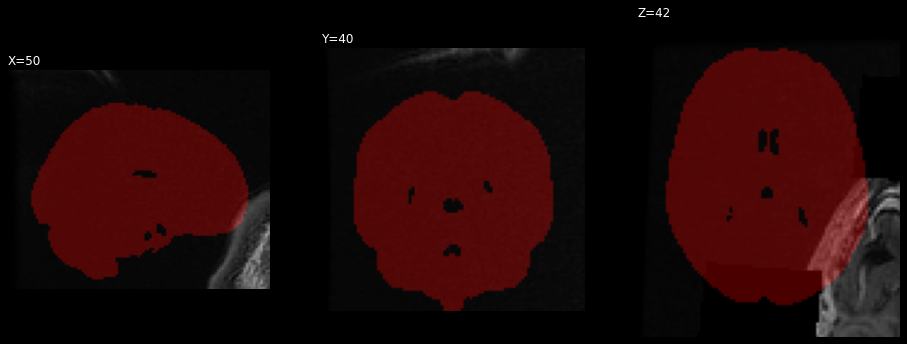

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


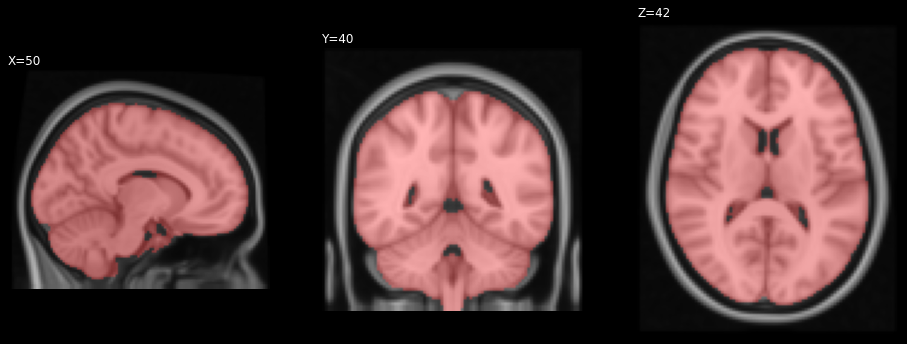

In [7]:
plot_mp_mri(T1.get_fdata(),temp_mask.get_fdata(),slice_num=[50,40,42])
plot_mp_mri(template.get_fdata(),temp_mask.get_fdata(),slice_num=[50,40,42])

### Register T1w image to MNI152 Template
 

In [8]:
!bash antsRegistrationSyNQuick.sh -d 3 -f MNI152_T1_2mm.nii.gz -m T1w.nii.gz -o T12std_ -n 10


--------------------------------------------------------------------------------------
 Mapping parameters
--------------------------------------------------------------------------------------
 ANTSPATH is /gdrive/MyDrive/ANTs/bin

 Dimensionality:           3
 Output name prefix:       T12std_
 Fixed images:             MNI152_T1_2mm.nii.gz
 Moving images:            T1w.nii.gz
 Mask images:              
 Initial transforms:       
 Number of threads:        10
 Spline distance:          26
 Transform type:           s
 MI histogram bins:        32
 Precision:                d
 Use histogram matching    0
 antsRegistration call:
--------------------------------------------------------------------------------------
/gdrive/MyDrive/ANTs/bin/antsRegistration --verbose 1 --dimensionality 3 --float 0 --collapse-output-transforms 1 --output [ T12std_,T12std_Warped.nii.gz,T12std_InverseWarped.nii.gz ] --interpolation Linear --use-histogram-matching 0 --winsorize-image-intensities [ 0.005,

## Plot registerd T1w imge together with our template brain mask

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


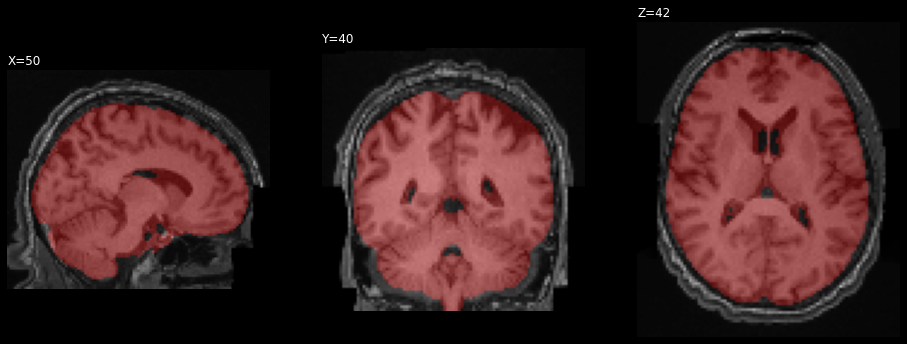

In [9]:
T1_registerd = nib.load(f'{data_path}/T12std_Warped.nii.gz')
plot_mp_mri(T1_registerd.get_fdata(),temp_mask.get_fdata(),slice_num=[50,40,42])

## Dummy skull-stripng !!!

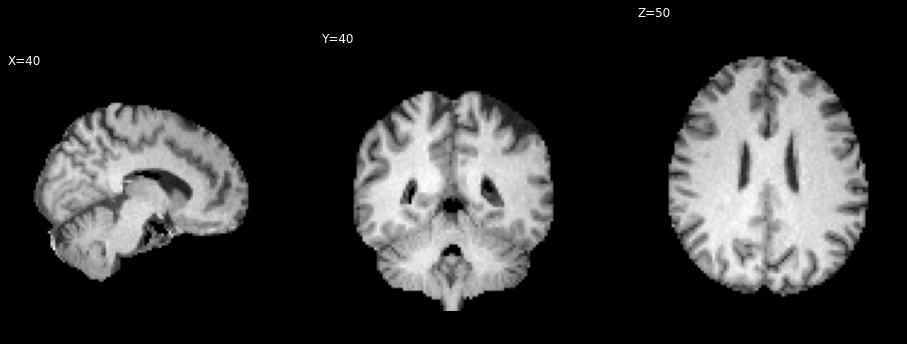

In [10]:
ss_t1 = temp_mask.get_fdata() * T1_registerd.get_fdata()
plot_mp_mri(ss_t1)

# Brain Extraction (Skull Striping) by ANTs function
* it takes ~ 1 hr to complete !!!
* right way for skull stripng :)

In [11]:
!bash antsBrainExtraction.sh -d 3 -a T12std_Warped.nii.gz -e T_template0.nii.gz -m T_template0_BrainCerebellumProbabilityMask.nii.gz -o T1_

 
Will run Atropos segmentation with K=3. Classes labeled in order of mean intensity. Assuming CSF=1, GM=2, WM=3


    Using antsBrainExtraction with the following arguments:
      image dimension         = 3
      anatomical image        = T12std_Warped.nii.gz
      extraction template     = T_template0.nii.gz
      extraction reg. mask    = 
      extraction prior        = T_template0_BrainCerebellumProbabilityMask.nii.gz
      output prefix           = T1_
      output image suffix     = nii.gz

    N4 parameters (pre brain extraction):
      convergence             = [ 50x50x50x50,0.0000001 ]
      shrink factor           = 4
      B-spline parameters     = [ 200 ]

    Atropos parameters (extraction):
       convergence            = [ 3,0.0 ]
       likelihood             = Gaussian
       initialization         = kmeans[ 3 ]
       mrf                    = [ 0.1,1x1x1 ]
       use clock random seed  = 1

---------------------  Running antsBrainExtraction.sh on d85d44085d89  -----

# T1w extracted brain 

<Figure size 720x360 with 0 Axes>

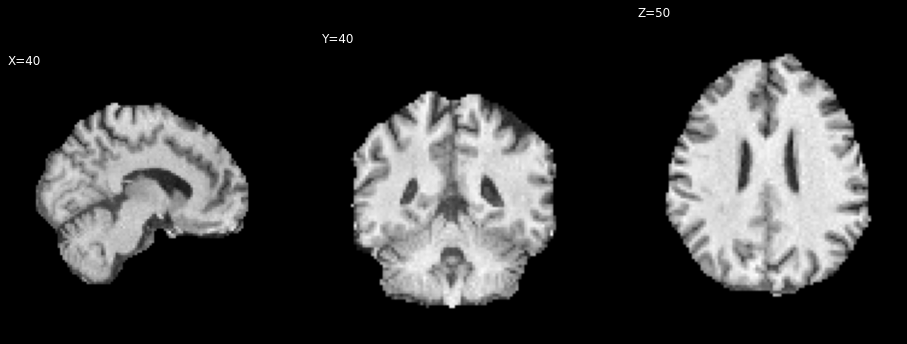

In [12]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import color
plt.figure(figsize = (10,5))
ss_brain = nib.load('/gdrive/MyDrive/mri/T1_BrainExtractionBrain.nii.gz')
plot_mp_mri(ss_brain.get_fdata())

## As you can see below we plot dummy brain extrcted image together with template mask, you can change the slice numbers and see how these two imges are aligned.

#First question

* we skiped one step from normalzation of T1w image to template image intentionally, based of above information,what do you think about droped step?, what that step is?
* Please write your answer in a new text section below this one.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


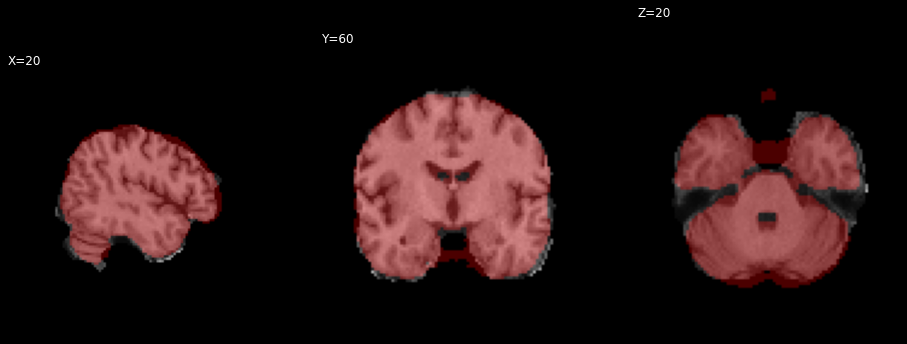

In [13]:
plot_mp_mri(ss_brain.get_fdata(),temp_mask.get_fdata(),[20,60,20])

# T1 image segmentation with [FastSurfer](https://github.com/Deep-MI/FastSurfer)

> Indented block



In [14]:
import os
import sys
from os.path import exists, join, basename, splitext

%cd /content
git_repo_url = 'https://github.com/deep-mi/fastsurfer.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install dependencies
  !git clone -q $git_repo_url
  sys.path.append(project_name)

# Go to the FastSurfer directory
%cd /content/fastsurfer/
!cp $data_path/testWarped.nii.gz /content
img = '/gdrive/MyDrive/mri/T12std_Warped.nii.gz'

# Run the program
! ./run_fastsurfer.sh --t1 $img \
                      --sd /content/fastsurfer_seg \
                      --sid my_sub \
                      --seg_only --py python3

/content
/content/fastsurfer
cp: cannot stat '/gdrive/MyDrive/mri/testWarped.nii.gz': No such file or directory
Setting ENV variable FASTSURFER_HOME to current working directory /content/fastsurfer. 
Change via enviroment to location of your choice if this is undesired (export FASTSURFER_HOME=/dir/to/FastSurfer)
Sat Jun  4 18:16:34 UTC 2022

/content/fastsurfer/FastSurferCNN /content/fastsurfer
python3 eval.py --in_name /gdrive/MyDrive/mri/T12std_Warped.nii.gz --out_name /content/fastsurfer_seg/my_sub/mri/aparc.DKTatlas+aseg.deep.mgz --conformed_name /content/fastsurfer_seg/my_sub/mri/orig.mgz --order 1 --network_sagittal_path /content/fastsurfer/checkpoints/Sagittal_Weights_FastSurferCNN/ckpts/Epoch_30_training_state.pkl --network_axial_path /content/fastsurfer/checkpoints/Axial_Weights_FastSurferCNN/ckpts/Epoch_30_training_state.pkl --network_coronal_path /content/fastsurfer/checkpoints/Coronal_Weights_FastSurferCNN/ckpts/Epoch_30_training_state.pkl --batch_size 8 --simple_run --run_

### Convert outputs of FastSurfer from (freesurfer formate) .mgz to .nii.gz 

In [15]:
data = nib.load('/content/fastsurfer_seg/my_sub/mri/aparc.DKTatlas+aseg.deep.mgz')
img_nifti = nib.Nifti1Image(data.get_fdata(), data.affine, header=nib.Nifti1Header())
nib.nifti1.save(img_nifti, f'{data_path}/aparc.DKTatlas+aseg.deep.nii.gz')

data = nib.load('/content/fastsurfer_seg/my_sub/mri/orig.mgz')
img_nifti = nib.Nifti1Image(data.get_fdata(), data.affine, header=nib.Nifti1Header())
nib.nifti1.save(img_nifti, f'{data_path}/orig.nii.gz')

## register segmented image to MNI152 Template



In [16]:
%cd $data_path
!bash antsRegistrationSyNQuick.sh -d 3 -f MNI152_T1_2mm.nii.gz -m orig.nii.gz -o seg2std_ -n 10

/gdrive/MyDrive/mri

--------------------------------------------------------------------------------------
 Mapping parameters
--------------------------------------------------------------------------------------
 ANTSPATH is /gdrive/MyDrive/ANTs/bin

 Dimensionality:           3
 Output name prefix:       seg2std_
 Fixed images:             MNI152_T1_2mm.nii.gz
 Moving images:            orig.nii.gz
 Mask images:              
 Initial transforms:       
 Number of threads:        10
 Spline distance:          26
 Transform type:           s
 MI histogram bins:        32
 Precision:                d
 Use histogram matching    0
 antsRegistration call:
--------------------------------------------------------------------------------------
/gdrive/MyDrive/ANTs/bin/antsRegistration --verbose 1 --dimensionality 3 --float 0 --collapse-output-transforms 1 --output [ seg2std_,seg2std_Warped.nii.gz,seg2std_InverseWarped.nii.gz ] --interpolation Linear --use-histogram-matching 0 --winsorize-i

## Apply Tansfrom to label image 

In [17]:
!antsApplyTransforms -d 3 -i aparc.DKTatlas+aseg.deep.nii.gz -r MNI152_T1_2mm.nii.gz -n MultiLabel -t [seg2std_0GenericAffine.mat,0] -t seg2std_1Warp.nii.gz -o T1_segmented.nii.gz 

## plot segmentation result

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


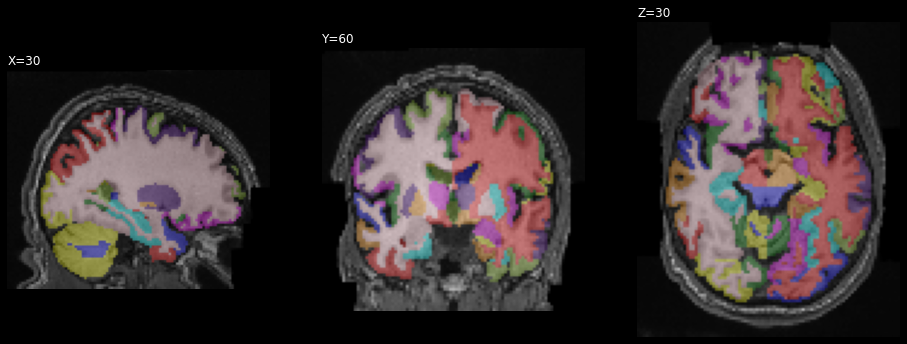

In [18]:
seg = nib.load('T1_segmented.nii.gz')
plot_mp_mri(mri = T1_registerd.get_fdata(), mask = seg.get_fdata(),slice_num=[30,60,30])

# Plot rest fMRI imgae

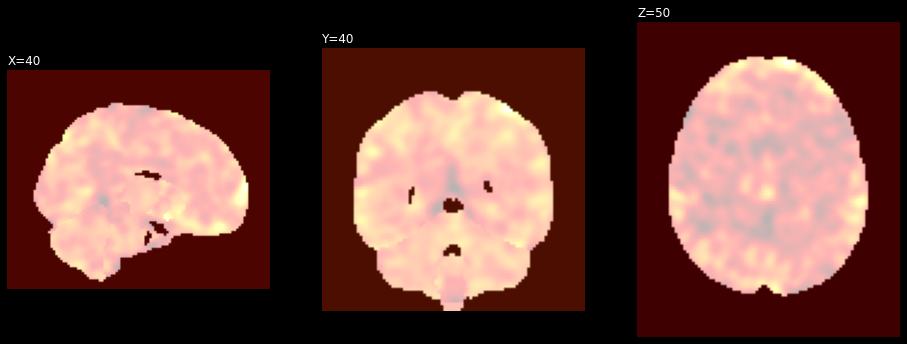

In [19]:
rest = nib.load('rest.nii.gz')
result = []
for i in range(120):
  result.append(np.multiply ( rest.get_fdata()[:,:,:,i] , temp_mask.get_fdata() ))

result2 = np.asarray(result)
result3 = np.einsum('lijk->ijkl', result2)

plot_mp_mri(temp_mask.get_fdata() , result3 , bold = True,time = 50,slice_num = [40,40,50])


## plot some voxles from left hippocampus.
##### to find left hippocampus label use *aparc+seg.txt* in requirement files

<function matplotlib.pyplot.show>

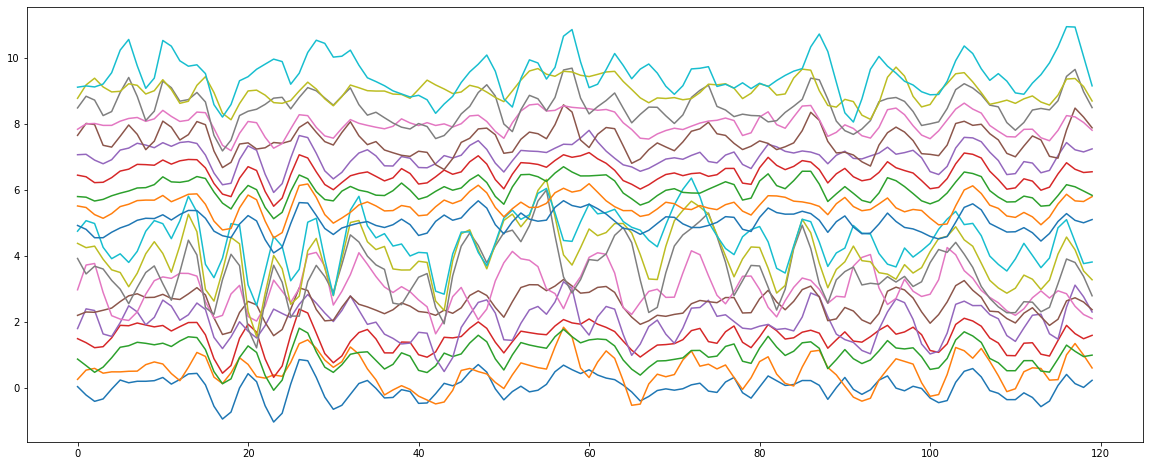

In [20]:
plt.figure(figsize = (20,8))
L_Hippocampus = 17

for voxel in range(20):
  plt.plot(range(120),rest.get_fdata()[seg.get_fdata() == 17][voxel]+ (.5 * voxel))

plt.show


# Seed-base correlation Analysis :

#### Seed-based Correlation Analysis (SCA) is one of the most common ways to explore functional connectivity within the brain. Based on the time series of a seed voxel (or ROI), connectivity is calculated as the correlation of time series for all other voxels in the brain. The result of SCA is a connectivity map showing Z-scores for each voxel indicating how well its time series correlates with the time series of the seed. Below is an example connectivity map showing correlated voxels based on a seed in the precuneus.






$$ r(x) = {\int{ S(x,t) R(t) dt } \over { \left( \int{ R^2(t) dt }\int{ S^2(x,t) dt }  \right)^{1/2} }} $$

\\
$$Z(x) = arctanh^{-1} ( r(x) ) $$

\\


* $S$ ➡ the BOLD timeseries at each voxel (for simplicity all timeseries are considered centered to zero mean).

* $R$ ➡ the average BOLD timeseries within an ROI

* $r$ ➡ the spatial map of Pearson correlation coefficients

* $x$ ➡ spatial location (voxels)

## File rest.nii.gz is mean resting state functional image for 1000 subjects.
## use this file and seed mask files to ask below questions.

* for each seed mask file, find the volume of seed region.
* for each seed mask file, find percentage of overlap between segmented labels(*aparc+seg.txt*) and seed region.
* Calculate SCA for each seed mask, transform raw r-values to Z-fisher and then find volexs with z-value more than 0.999 and less than 0.001 percentile values (significant voxels).
* for each seed mask, find percentage of SCA significant voxels of each region in segmented file.
* plot inter-section between all 5 seed region SC network in a $5 \times 5$ matrix based on number of overlaped voxels



* Don't forget "**Do the all calculations just inside Brain mask**"

# **Seed 1**

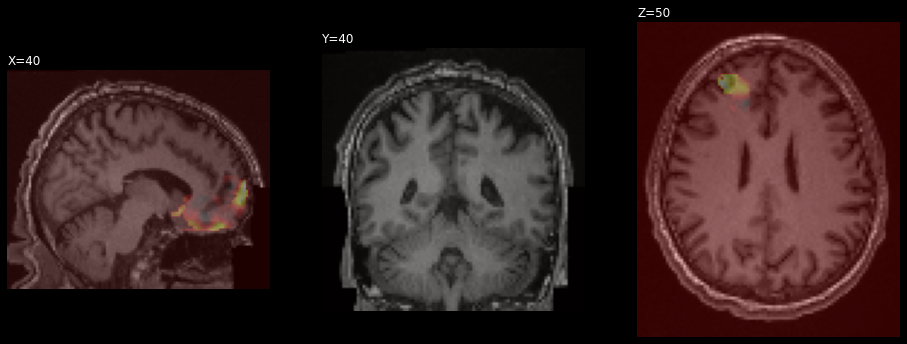

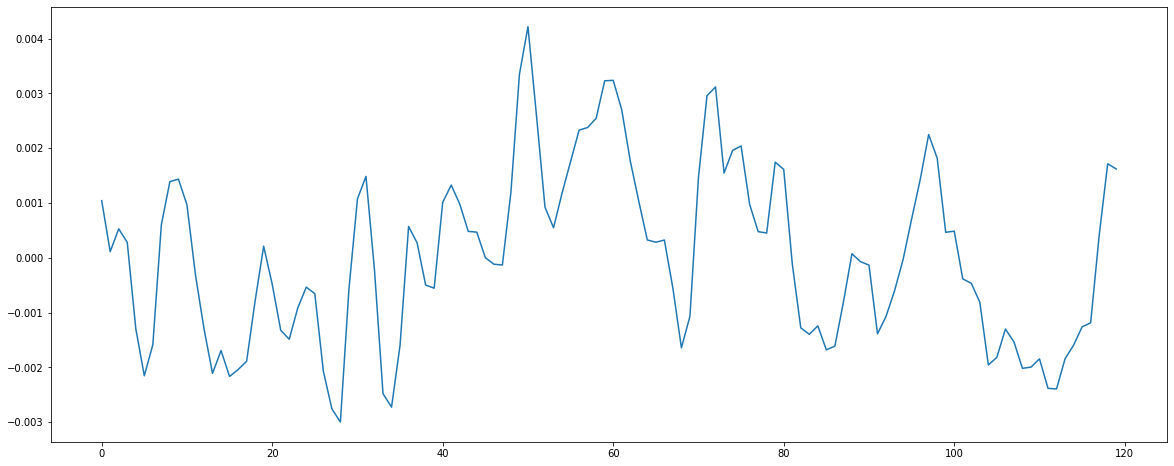

In [21]:
from scipy.ndimage.measurements import mean
path1 = '/gdrive/MyDrive/mri/seed1.nii'
seed1 = nib.load(path1)
seed1_data = []
for i in range(120):
  seed1_data.append(np.multiply ( rest.get_fdata()[:,:,:,i] , seed1.get_fdata()))

seed1_data1 = np.asarray(seed1_data)
seed1_data2 = np.einsum('lijk->ijkl', seed1_data1)

plot_mp_mri(T1_registerd.get_fdata(), seed1_data2 , bold = True,time = 50,slice_num = [40,40,50])
plt.figure(figsize = (20,8))

mean_seed1 = []
for i in range(120):
  mean_seed1.append(mean(seed1_data2[:,:,:,i]))
plt.plot(mean_seed1)
plt.show()

In [22]:
import gc
del seed1_data
del seed1_data1
del seed1_data2
gc.collect()

2578

## **Volume of Seed 1**

In [23]:
voxel_vol = 1*1*1  
cnt_vxl_seed1 = 0
for i in range(seed1.shape[0]):
   for j in range(seed1.shape[1]):
      for k in range(seed1.shape[2]):
        x = seed1.get_fdata()[i,j,k]
        if (x==1):
          cnt_vxl_seed1 += 1
print(f"Volume of region Seed 1 is: {cnt_vxl_seed1*voxel_vol} mm^3")

Volume of region Seed 1 is: 9782 mm^3


## **Overlap Percentage of Seed 1**

In [24]:
with open('aparc+seg.txt') as f:
    lines = f.readlines()
segments = []
ix = 3
while ix < len(lines):
  segments.append(int(lines[ix].strip(' \n')))
  ix+=2


maskOfseg = np.zeros((91,109,91 ,len(segments)))
data_seg = seg.get_fdata()
for se in range(len(segments)):
  for i in range(seed1.shape[0]):
   for j in range(seed1.shape[1]):
      for k in range(seed1.shape[2]):
        maskOfseg[i,j,k,se] = 1 if data_seg[i,j,k] == segments[se] else 0


In [25]:
union_counter = 0
intersect_counter = 0
overlap_list = []
seed_data = seed1.get_fdata()

for se in range(len(segments)):
  union_counter = 0
  intersect_counter = 0
  for i in range(seed1.shape[0]):
   for j in range(seed1.shape[1]):
      for k in range(seed1.shape[2]):
        if (seed_data[i,j,k] == 1 or maskOfseg[i,j,k,se] == 1  ):
          union_counter+=1
        if (seed_data[i,j,k] == 1 and maskOfseg[i,j,k,se] == 1  ):
          intersect_counter+=1
  overlap_list.append(( intersect_counter /  union_counter )*100)

print("overlap percentage between")
for i in range(len(segments)):
  print(f"Seed 1 and Segment {segments[i]} : {overlap_list[i]}%")

overlap percentage between
Seed 1 and Segment 2 : 0.04058507443302651%
Seed 1 and Segment 4 : 0.0%
Seed 1 and Segment 5 : 0.0%
Seed 1 and Segment 7 : 0.0%
Seed 1 and Segment 8 : 0.0%
Seed 1 and Segment 10 : 0.0%
Seed 1 and Segment 11 : 0.0%
Seed 1 and Segment 12 : 0.0%
Seed 1 and Segment 13 : 0.0%
Seed 1 and Segment 14 : 0.0%
Seed 1 and Segment 15 : 0.0%
Seed 1 and Segment 16 : 0.0%
Seed 1 and Segment 17 : 0.0%
Seed 1 and Segment 18 : 0.0%
Seed 1 and Segment 24 : 0.0%
Seed 1 and Segment 26 : 0.0%
Seed 1 and Segment 28 : 0.0%
Seed 1 and Segment 30 : 0.0%
Seed 1 and Segment 31 : 0.0%
Seed 1 and Segment 41 : 11.158181546730367%
Seed 1 and Segment 43 : 0.4247627654767284%
Seed 1 and Segment 44 : 0.0%
Seed 1 and Segment 46 : 0.0%
Seed 1 and Segment 47 : 0.0%
Seed 1 and Segment 49 : 0.0%
Seed 1 and Segment 50 : 0.6468685680682152%
Seed 1 and Segment 51 : 0.23609405987345355%
Seed 1 and Segment 52 : 0.0%
Seed 1 and Segment 53 : 0.0%
Seed 1 and Segment 54 : 0.0%
Seed 1 and Segment 58 : 0.18270

In [26]:
del seed_data
gc.collect()

100

## **Correlation for Seed 1**

In [27]:
import scipy.stats
significant_seed1 = np.zeros((seed1.shape[0],seed1.shape[1],seed1.shape[2]))
corr_seed1 = np.zeros((seed1.shape[0],seed1.shape[1],seed1.shape[2]))
for i in range(seed1.shape[0]):
   for j in range(seed1.shape[1]):
      for k in range(seed1.shape[2]):
        x = seed1.get_fdata()[i,j,k]
        if (x == 0):
          if (np.var(rest.get_fdata()[i,j,k,:]) != 0):
            corr_seed1[i,j,k] = np.corrcoef(mean_seed1,rest.get_fdata()[i,j,k,:])[0,1]
            z_score = np.arctanh(corr_seed1[i,j,k])
            if ( z_score < 0.001):
              significant_seed1[i,j,k] = 1




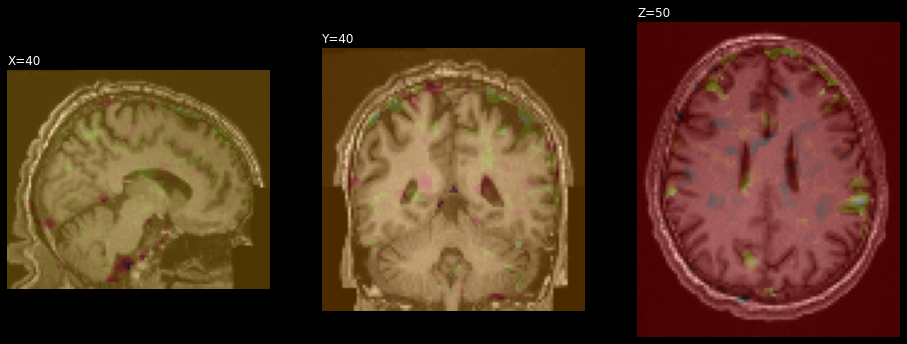

In [29]:
significant_seed1_1 = []
for i in range(120):
  significant_seed1_1.append(np.multiply ( rest.get_fdata()[:,:,:,i] , significant_seed1))

significant_seed1_2 = np.asarray(significant_seed1_1)
significant_seed1_3 = np.einsum('lijk->ijkl', significant_seed1_2)
plot_mp_mri(T1_registerd.get_fdata(), significant_seed1_3 , bold = True,time = 50,slice_num = [40,40,50])


In [30]:
del significant_seed1
del significant_seed1_1
del significant_seed1_2
del significant_seed1_3
gc.collect()

4842

## **Percentage of significantly correalted voxels of each segment with Seed 1**

In [31]:
corr_seg = []
for se in range(len(segments)):
  cnt0 = 0
  cnt1 = 0
  for i in range(seed1.shape[0]):
    for j in range(seed1.shape[1]):
      for k in range(seed1.shape[2]):
        x = maskOfseg[i,j,k,se]
        if x == 1:
          if (np.var(rest.get_fdata()[i,j,k,:]) != 0):
            y = np.corrcoef(mean_seed1,rest.get_fdata()[i,j,k,:])[0,1]
            z_score = np.arctanh(y)
            if ( z_score < 0.001):
              cnt1 += 1
            else:
              cnt0 += 1
  if (cnt0 + cnt1) > 0:
    corr_seg.append(cnt1/ (cnt0 + cnt1)*100)
  else:
    corr_seg.append(0)

In [32]:
print("percentage of significantly correlated voxels of each segment with Seed 1 ")
for i in range(len(segments)):
  print(f"Seed 1 and Segment {segments[i]} : {corr_seg[i]}%")

percentage of significantly correlated voxels of each segment with Seed 1 
Seed 1 and Segment 2 : 29.313271604938272%
Seed 1 and Segment 4 : 78.5142024763292%
Seed 1 and Segment 5 : 100.0%
Seed 1 and Segment 7 : 16.615787178368947%
Seed 1 and Segment 8 : 18.983234180638185%
Seed 1 and Segment 10 : 30.29595015576324%
Seed 1 and Segment 11 : 39.79381443298969%
Seed 1 and Segment 12 : 34.417040358744394%
Seed 1 and Segment 13 : 29.381443298969074%
Seed 1 and Segment 14 : 22.282608695652172%
Seed 1 and Segment 15 : 20.3125%
Seed 1 and Segment 16 : 27.53861321064739%
Seed 1 and Segment 17 : 26.479750778816197%
Seed 1 and Segment 18 : 4.411764705882353%
Seed 1 and Segment 24 : 63.67924528301887%
Seed 1 and Segment 26 : 0.0%
Seed 1 and Segment 28 : 15.097159940209268%
Seed 1 and Segment 30 : 0%
Seed 1 and Segment 31 : 60.86956521739131%
Seed 1 and Segment 41 : 28.83630300717141%
Seed 1 and Segment 43 : 78.7218045112782%
Seed 1 and Segment 44 : 0.0%
Seed 1 and Segment 46 : 14.111922141119221%


In [33]:
del corr_seg
gc.collect()

53

# **Seed 2**

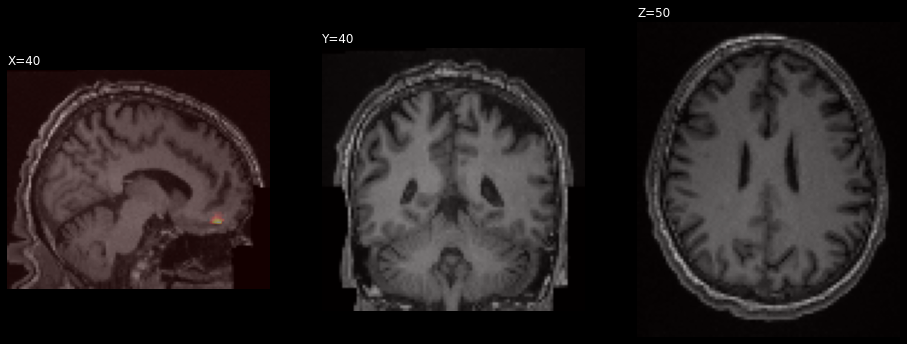

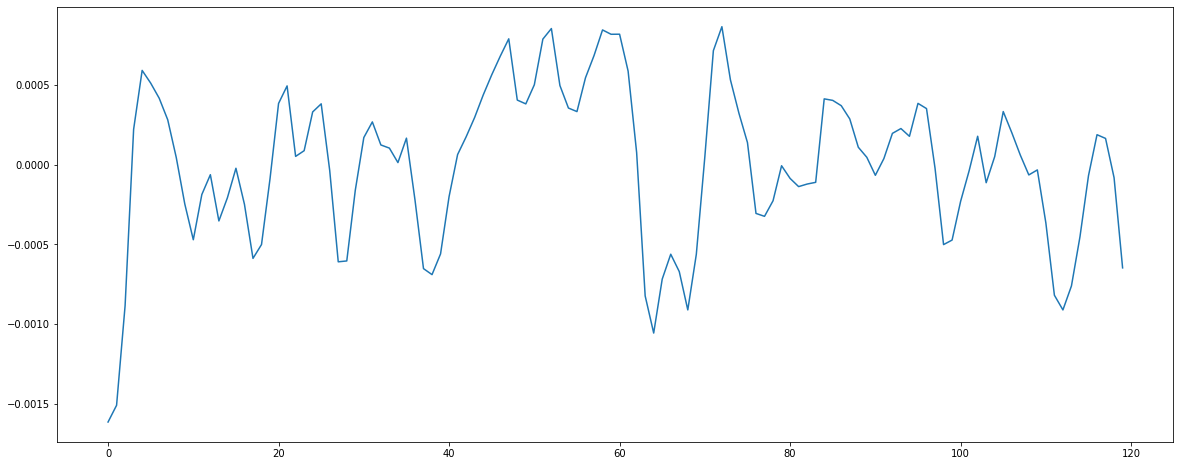

In [34]:
path2 = '/gdrive/MyDrive/mri/seed2.nii'
seed1 = nib.load(path2)
seed1_data = []
for i in range(120):
  seed1_data.append(np.multiply ( rest.get_fdata()[:,:,:,i] , seed1.get_fdata()))

seed1_data1 = np.asarray(seed1_data)
seed1_data2 = np.einsum('lijk->ijkl', seed1_data1)

plot_mp_mri(T1_registerd.get_fdata(), seed1_data2 , bold = True,time = 50,slice_num = [40,40,50])
plt.figure(figsize = (20,8))
mean_seed2 = []
for i in range(120):
  mean_seed2.append(mean(seed1_data2[:,:,:,i]))
plt.plot(mean_seed2)
plt.show()

In [35]:
del seed1_data
del seed1_data1
del seed1_data2
gc.collect()

7157

## **Volume of Seed 2**

In [36]:
voxel_vol = 1*1*1  
cnt_vxl_seed2 = 0
for i in range(seed1.shape[0]):
   for j in range(seed1.shape[1]):
      for k in range(seed1.shape[2]):
        x = seed1.get_fdata()[i,j,k]
        if (x==1):
          cnt_vxl_seed2 += 1
print(f"Volume of region Seed 2 is: {cnt_vxl_seed2*voxel_vol} mm^3")

Volume of region Seed 2 is: 2212 mm^3


## **Overlap Percentage of Seed 2**

In [37]:
union_counter = 0
intersect_counter = 0
overlap_list = []
seed_data = seed1.get_fdata()

for se in range(len(segments)):
  union_counter = 0
  intersect_counter = 0
  for i in range(seed1.shape[0]):
   for j in range(seed1.shape[1]):
      for k in range(seed1.shape[2]):
        if (seed_data[i,j,k] == 1 or maskOfseg[i,j,k,se] == 1  ):
          union_counter+=1
        if (seed_data[i,j,k] == 1 and maskOfseg[i,j,k,se] == 1  ):
          intersect_counter+=1
  overlap_list.append(( intersect_counter /  union_counter )*100)

print("overlap percentage between")
for i in range(len(segments)):
  print(f"Seed 2 and Segment {segments[i]} : {overlap_list[i]}%")

overlap percentage between
Seed 2 and Segment 2 : 1.2341979586103569%
Seed 2 and Segment 4 : 0.0%
Seed 2 and Segment 5 : 0.0%
Seed 2 and Segment 7 : 0.0%
Seed 2 and Segment 8 : 0.052388020605954766%
Seed 2 and Segment 10 : 0.0%
Seed 2 and Segment 11 : 0.0%
Seed 2 and Segment 12 : 0.0%
Seed 2 and Segment 13 : 0.0%
Seed 2 and Segment 14 : 0.0%
Seed 2 and Segment 15 : 0.0%
Seed 2 and Segment 16 : 0.0%
Seed 2 and Segment 17 : 0.0%
Seed 2 and Segment 18 : 0.0%
Seed 2 and Segment 24 : 0.0%
Seed 2 and Segment 26 : 0.0%
Seed 2 and Segment 28 : 0.0%
Seed 2 and Segment 30 : 0.0%
Seed 2 and Segment 31 : 0.0%
Seed 2 and Segment 41 : 0.16761068084614497%
Seed 2 and Segment 43 : 0.0%
Seed 2 and Segment 44 : 0.0%
Seed 2 and Segment 46 : 0.0%
Seed 2 and Segment 47 : 0.0%
Seed 2 and Segment 49 : 0.0%
Seed 2 and Segment 50 : 0.0%
Seed 2 and Segment 51 : 0.0%
Seed 2 and Segment 52 : 0.0%
Seed 2 and Segment 53 : 0.0%
Seed 2 and Segment 54 : 0.0%
Seed 2 and Segment 58 : 0.0%
Seed 2 and Segment 60 : 0.0%
Se

In [38]:
del seed_data
gc.collect()

50

# **Correlation for Seed 2**

In [39]:
import scipy.stats
significant_seed1 = np.zeros((seed1.shape[0],seed1.shape[1],seed1.shape[2]))
corr_seed1 = np.zeros((seed1.shape[0],seed1.shape[1],seed1.shape[2]))
for i in range(seed1.shape[0]):
   for j in range(seed1.shape[1]):
      for k in range(seed1.shape[2]):
        x = seed1.get_fdata()[i,j,k]
        if (x == 0):
          if (np.var(rest.get_fdata()[i,j,k,:]) != 0):
            corr_seed1[i,j,k] = np.corrcoef(mean_seed2,rest.get_fdata()[i,j,k,:])[0,1]
            z_score = np.arctanh(corr_seed1[i,j,k])
            #p_value = scipy.stats.norm.sf(abs(z_score))*2 #finding p-value
            if ( z_score < 0.001):
              significant_seed1[i,j,k] = 1

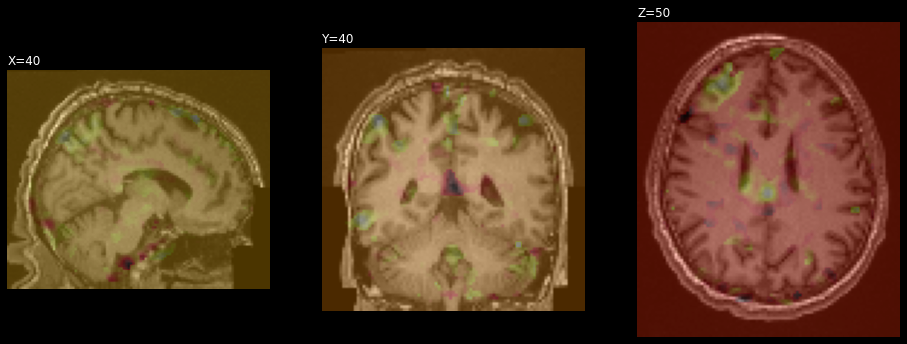

In [40]:
significant_seed1_1 = []
for i in range(120):
  significant_seed1_1.append(np.multiply ( rest.get_fdata()[:,:,:,i] , significant_seed1))

significant_seed1_2 = np.asarray(significant_seed1_1)
significant_seed1_3 = np.einsum('lijk->ijkl', significant_seed1_2)
plot_mp_mri(T1_registerd.get_fdata(), significant_seed1_3 , bold = True,time = 50,slice_num = [40,40,50])

In [41]:
del significant_seed1
del significant_seed1_1
del significant_seed1_2
del significant_seed1_3
gc.collect()

4804

## **Percentage of significantly correalted voxels of each segment with Seed 2**

In [42]:
corr_seg = []
for se in range(len(segments)):
  cnt0 = 0
  cnt1 = 0
  for i in range(seed1.shape[0]):
    for j in range(seed1.shape[1]):
      for k in range(seed1.shape[2]):
        x = maskOfseg[i,j,k,se]
        if x == 1:
          if (np.var(rest.get_fdata()[i,j,k,:]) != 0):
            y = np.corrcoef(mean_seed2,rest.get_fdata()[i,j,k,:])[0,1]
            z_score = np.arctanh(y)
            if ( z_score < 0.001):
              cnt1 += 1
            else:
              cnt0 += 1
  if (cnt0 + cnt1) > 0:
    corr_seg.append(cnt1/ (cnt0 + cnt1)*100)
  else:
    corr_seg.append(0)

In [77]:
print("percentage of significantly correlated voxels of each segment with Seed 2 ")
for i in range(len(segments)):
  print(f"Seed 2 and Segment {segments[i]} : {corr_seg[i]}%")

percentage of significantly correlated voxels of each segment with Seed 2 
Seed 2 and Segment 2 : 24.29591049382716%
Seed 2 and Segment 4 : 78.22286962855061%
Seed 2 and Segment 5 : 100.0%
Seed 2 and Segment 7 : 10.423026602703882%
Seed 2 and Segment 8 : 19.004867495943753%
Seed 2 and Segment 10 : 14.018691588785046%
Seed 2 and Segment 11 : 25.36082474226804%
Seed 2 and Segment 12 : 12.331838565022421%
Seed 2 and Segment 13 : 6.958762886597938%
Seed 2 and Segment 14 : 10.326086956521738%
Seed 2 and Segment 15 : 50.520833333333336%
Seed 2 and Segment 16 : 28.9516924088071%
Seed 2 and Segment 17 : 17.133956386292834%
Seed 2 and Segment 18 : 1.8382352941176472%
Seed 2 and Segment 24 : 40.09433962264151%
Seed 2 and Segment 26 : 0.0%
Seed 2 and Segment 28 : 4.185351270553064%
Seed 2 and Segment 30 : 0%
Seed 2 and Segment 31 : 98.26086956521739%
Seed 2 and Segment 41 : 23.187561519455212%
Seed 2 and Segment 43 : 75.63909774436091%
Seed 2 and Segment 44 : 0.0%
Seed 2 and Segment 46 : 12.70072

In [43]:
del corr_seg
gc.collect()

100

# **Seed 3**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


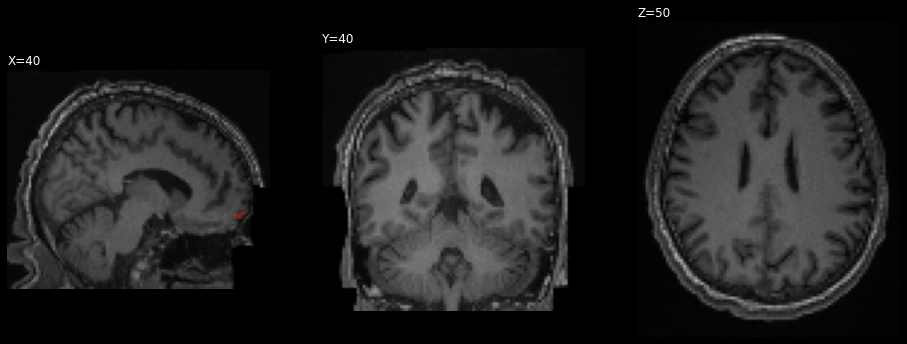

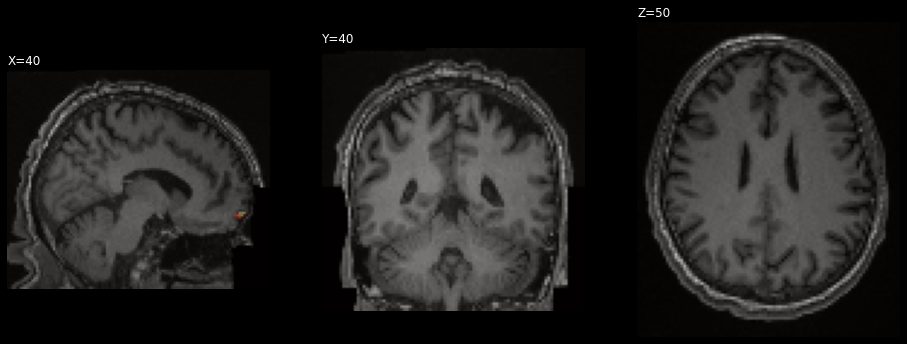

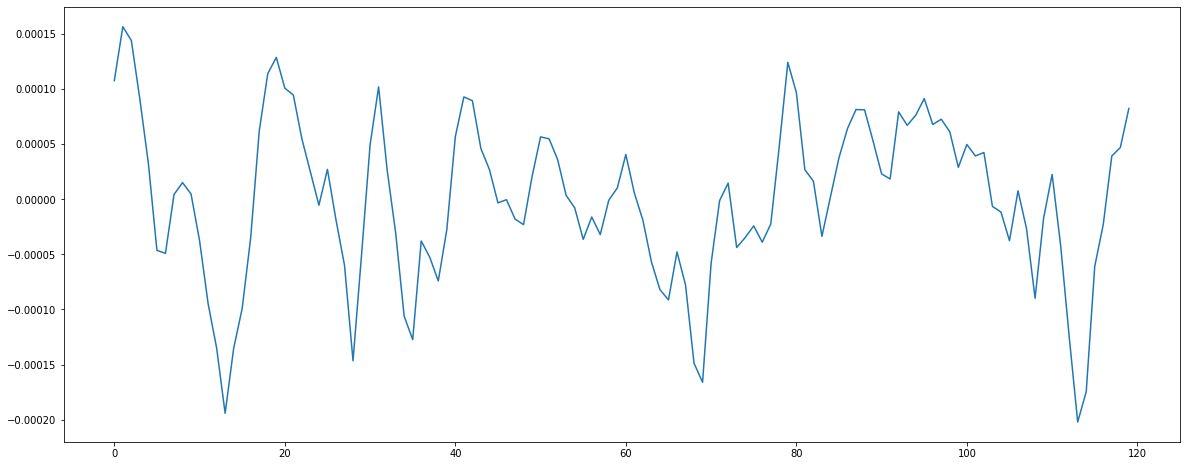

In [44]:
path3 = '/gdrive/MyDrive/mri/seed3.nii'
seed1 = nib.load(path3)
seed1_data = []
for i in range(120):
  seed1_data.append(np.multiply ( rest.get_fdata()[:,:,:,i] , seed1.get_fdata()))

seed1_data1 = np.asarray(seed1_data)
seed1_data2 = np.einsum('lijk->ijkl', seed1_data1)

plot_mp_mri(T1_registerd.get_fdata(), seed1.get_fdata(), bold = False,slice_num = [40,40,50])
plot_mp_mri(T1_registerd.get_fdata(), seed1_data2 , bold = True,time = 50,slice_num = [40,40,50])
plt.figure(figsize = (20,8))
mean_seed3 = []
for i in range(120):
  mean_seed3.append(mean(seed1_data2[:,:,:,i]))
plt.plot(mean_seed3)
plt.show()

In [45]:
del seed1_data
del seed1_data1
del seed1_data2
gc.collect()

12137

## **Volume of Seed 3**

In [46]:
voxel_vol = 1*1*1  
cnt_vxl_seed3 = 0
for i in range(seed1.shape[0]):
   for j in range(seed1.shape[1]):
      for k in range(seed1.shape[2]):
        x = seed1.get_fdata()[i,j,k]
        if (x==1):
          cnt_vxl_seed3 += 1
print(f"Volume of region Seed 3 is: {cnt_vxl_seed3*voxel_vol} mm^3")

Volume of region Seed 3 is: 171 mm^3


## **Overlap Percentage of Seed 3**

In [47]:
union_counter = 0
intersect_counter = 0
overlap_list = []
seed_data = seed1.get_fdata()

for se in range(len(segments)):
  union_counter = 0
  intersect_counter = 0
  for i in range(seed1.shape[0]):
   for j in range(seed1.shape[1]):
      for k in range(seed1.shape[2]):
        if (seed_data[i,j,k] == 1 or maskOfseg[i,j,k,se] == 1  ):
          union_counter+=1
        if (seed_data[i,j,k] == 1 and maskOfseg[i,j,k,se] == 1  ):
          intersect_counter+=1
  overlap_list.append(( intersect_counter /  union_counter )*100)



In [48]:
print("overlap percentage between")
for i in range(len(segments)):
  print(f"Seed 3 and Segment {segments[i]} : {overlap_list[i]}%")

overlap percentage between
Seed 3 and Segment 2 : 0.08274004233211468%
Seed 3 and Segment 4 : 0.0%
Seed 3 and Segment 5 : 0.0%
Seed 3 and Segment 7 : 0.0%
Seed 3 and Segment 8 : 0.0%
Seed 3 and Segment 10 : 0.0%
Seed 3 and Segment 11 : 0.0%
Seed 3 and Segment 12 : 0.0%
Seed 3 and Segment 13 : 0.0%
Seed 3 and Segment 14 : 0.0%
Seed 3 and Segment 15 : 0.0%
Seed 3 and Segment 16 : 0.0%
Seed 3 and Segment 17 : 0.0%
Seed 3 and Segment 18 : 0.0%
Seed 3 and Segment 24 : 0.0%
Seed 3 and Segment 26 : 0.0%
Seed 3 and Segment 28 : 0.0%
Seed 3 and Segment 30 : 0.0%
Seed 3 and Segment 31 : 0.0%
Seed 3 and Segment 41 : 0.040054474084755265%
Seed 3 and Segment 43 : 0.0%
Seed 3 and Segment 44 : 0.0%
Seed 3 and Segment 46 : 0.0%
Seed 3 and Segment 47 : 0.0%
Seed 3 and Segment 49 : 0.0%
Seed 3 and Segment 50 : 0.0%
Seed 3 and Segment 51 : 0.0%
Seed 3 and Segment 52 : 0.0%
Seed 3 and Segment 53 : 0.0%
Seed 3 and Segment 54 : 0.0%
Seed 3 and Segment 58 : 0.0%
Seed 3 and Segment 60 : 0.0%
Seed 3 and Segmen

In [49]:
del seed_data
del overlap_list
gc.collect()

50

# **Correaltion Seed 3**

In [50]:
import scipy.stats
significant_seed1 = np.zeros((seed1.shape[0],seed1.shape[1],seed1.shape[2]))
corr_seed1 = np.zeros((seed1.shape[0],seed1.shape[1],seed1.shape[2]))
for i in range(seed1.shape[0]):
   for j in range(seed1.shape[1]):
      for k in range(seed1.shape[2]):
        x = seed1.get_fdata()[i,j,k]
        if (x == 0):
          if (np.var(rest.get_fdata()[i,j,k,:]) != 0):
            corr_seed1[i,j,k] = np.corrcoef(mean_seed3,rest.get_fdata()[i,j,k,:])[0,1]
            z_score = np.arctanh(corr_seed1[i,j,k])
            if ( z_score < 0.001):
              significant_seed1[i,j,k] = 1

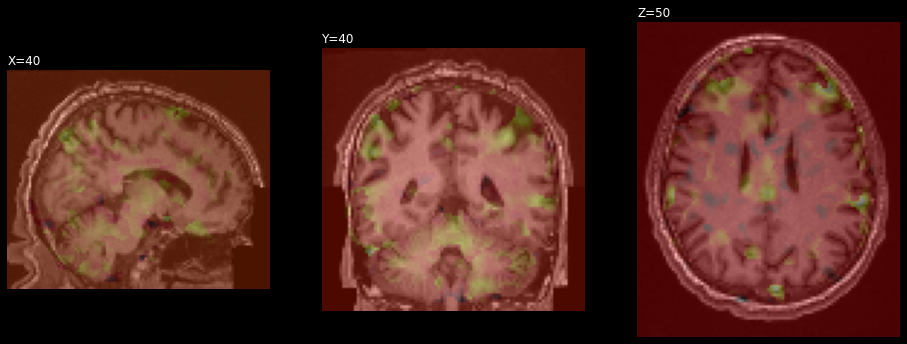

In [51]:
significant_seed1_1 = []
for i in range(120):
  significant_seed1_1.append(np.multiply ( rest.get_fdata()[:,:,:,i] , significant_seed1))

significant_seed1_2 = np.asarray(significant_seed1_1)
significant_seed1_3 = np.einsum('lijk->ijkl', significant_seed1_2)
plot_mp_mri(T1_registerd.get_fdata(), significant_seed1_3 , bold = True,time = 50,slice_num = [40,40,50])

In [52]:
del significant_seed1
del significant_seed1_1
del significant_seed1_2
del significant_seed1_3
gc.collect()

4804

## **Percentage of significantly correalted voxels of each segment with Seed 3**

In [53]:
corr_seg = []
for se in range(len(segments)):
  cnt0 = 0
  cnt1 = 0
  for i in range(seed1.shape[0]):
    for j in range(seed1.shape[1]):
      for k in range(seed1.shape[2]):
        x = maskOfseg[i,j,k,se]
        if x == 1:
          if (np.var(rest.get_fdata()[i,j,k,:]) != 0):
            y = np.corrcoef(mean_seed3,rest.get_fdata()[i,j,k,:])[0,1]
            z_score = np.arctanh(y)
            if ( z_score < 0.001):
              cnt1 += 1
            else:
              cnt0 += 1
  if (cnt0 + cnt1) > 0:
    corr_seg.append(cnt1/ (cnt0 + cnt1)*100)
  else:
    corr_seg.append(0)

In [54]:
print("percentage of significantly correlated voxels of each segment with Seed 3 ")
for i in range(len(segments)):
  print(f"Seed 3 and Segment {segments[i]} : {corr_seg[i]}%")

percentage of significantly correlated voxels of each segment with Seed 3 
Seed 3 and Segment 2 : 43.35069444444444%
Seed 3 and Segment 4 : 74.43554260742899%
Seed 3 and Segment 5 : 50.0%
Seed 3 and Segment 7 : 74.74923680767553%
Seed 3 and Segment 8 : 63.428880475932935%
Seed 3 and Segment 10 : 82.71028037383178%
Seed 3 and Segment 11 : 85.77319587628865%
Seed 3 and Segment 12 : 88.90134529147981%
Seed 3 and Segment 13 : 97.16494845360825%
Seed 3 and Segment 14 : 79.07608695652173%
Seed 3 and Segment 15 : 14.583333333333334%
Seed 3 and Segment 16 : 58.52776864935918%
Seed 3 and Segment 17 : 54.20560747663551%
Seed 3 and Segment 18 : 48.89705882352941%
Seed 3 and Segment 24 : 89.62264150943396%
Seed 3 and Segment 26 : 17.346938775510203%
Seed 3 and Segment 28 : 66.51718983557548%
Seed 3 and Segment 30 : 0%
Seed 3 and Segment 31 : 66.08695652173913%
Seed 3 and Segment 41 : 46.487615757015725%
Seed 3 and Segment 43 : 69.47368421052632%
Seed 3 and Segment 44 : 0.0%
Seed 3 and Segment 46 :

In [55]:
del corr_seg
gc.collect()

50

# **Seed 4**

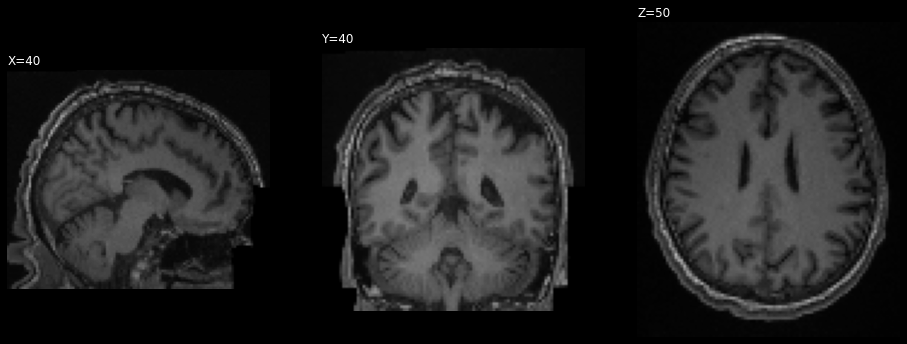

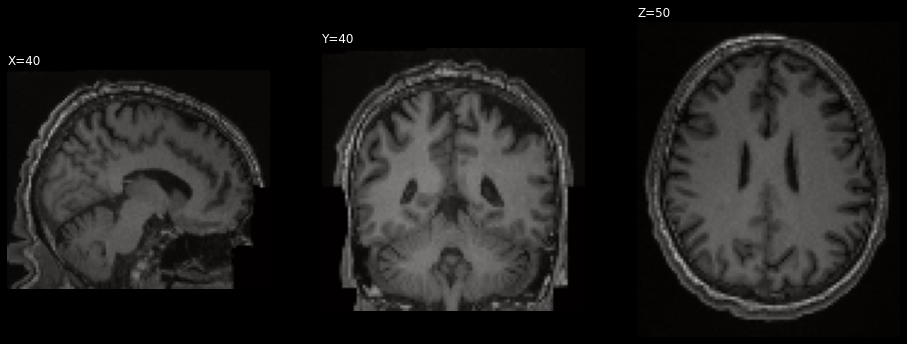

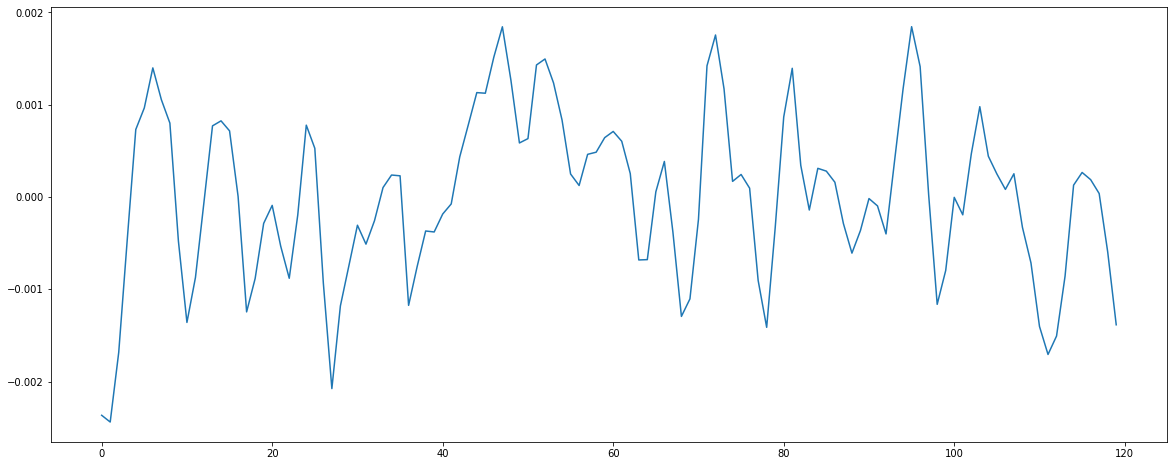

In [56]:
path4 = '/gdrive/MyDrive/mri/seed4.nii'
seed1 = nib.load(path4)

seed1_data = []
for i in range(120):
  seed1_data.append(np.multiply ( rest.get_fdata()[:,:,:,i] , seed1.get_fdata()))

seed1_data1 = np.asarray(seed1_data)
seed1_data2 = np.einsum('lijk->ijkl', seed1_data1)

plot_mp_mri(T1_registerd.get_fdata(), seed1.get_fdata(), bold = False,slice_num = [40,40,50])
plot_mp_mri(T1_registerd.get_fdata(), seed1_data2 , bold = True,time = 50,slice_num = [40,40,50])
plt.figure(figsize = (20,8))
mean_seed4 = []
for i in range(120):
  mean_seed4.append(mean(seed1_data2[:,:,:,i]))
plt.plot(mean_seed4)
plt.show()

In [57]:
del seed1_data
del seed1_data1
del seed1_data2
gc.collect()

11911

## **Volume of Seed 4**

In [58]:
voxel_vol = 1*1*1  
cnt_vxl_seed4 = 0
for i in range(seed1.shape[0]):
   for j in range(seed1.shape[1]):
      for k in range(seed1.shape[2]):
        x = seed1.get_fdata()[i,j,k]
        if (x==1):
          cnt_vxl_seed4 += 1
print(f"Volume of region Seed 4 is: {cnt_vxl_seed4*voxel_vol} mm^3")

Volume of region Seed 4 is: 4702 mm^3


## **Overlap Percentage of Seed 4**

In [59]:
union_counter = 0
intersect_counter = 0
overlap_list = []
seed_data = seed1.get_fdata()

for se in range(len(segments)):
  union_counter = 0
  intersect_counter = 0
  for i in range(seed1.shape[0]):
   for j in range(seed1.shape[1]):
      for k in range(seed1.shape[2]):
        if (seed_data[i,j,k] == 1 or maskOfseg[i,j,k,se] == 1  ):
          union_counter+=1
        if (seed_data[i,j,k] == 1 and maskOfseg[i,j,k,se] == 1  ):
          intersect_counter+=1
  overlap_list.append(( intersect_counter /  union_counter )*100)

print("overlap percentage between")
for i in range(len(segments)):
  print(f"Seed 4 and Segment {segments[i]} : {overlap_list[i]}%")

overlap percentage between
Seed 4 and Segment 2 : 0.0%
Seed 4 and Segment 4 : 0.0%
Seed 4 and Segment 5 : 0.0%
Seed 4 and Segment 7 : 0.0%
Seed 4 and Segment 8 : 0.0%
Seed 4 and Segment 10 : 0.0%
Seed 4 and Segment 11 : 0.0%
Seed 4 and Segment 12 : 0.0%
Seed 4 and Segment 13 : 0.0%
Seed 4 and Segment 14 : 0.0%
Seed 4 and Segment 15 : 0.0%
Seed 4 and Segment 16 : 0.0%
Seed 4 and Segment 17 : 0.0%
Seed 4 and Segment 18 : 0.0%
Seed 4 and Segment 24 : 0.0%
Seed 4 and Segment 26 : 0.0%
Seed 4 and Segment 28 : 0.0%
Seed 4 and Segment 30 : 0.0%
Seed 4 and Segment 31 : 0.0%
Seed 4 and Segment 41 : 3.1757754800590843%
Seed 4 and Segment 43 : 0.0%
Seed 4 and Segment 44 : 0.0%
Seed 4 and Segment 46 : 0.0%
Seed 4 and Segment 47 : 0.0%
Seed 4 and Segment 49 : 0.0%
Seed 4 and Segment 50 : 0.0%
Seed 4 and Segment 51 : 2.329881656804734%
Seed 4 and Segment 52 : 0.1188118811881188%
Seed 4 and Segment 53 : 0.0%
Seed 4 and Segment 54 : 0.0%
Seed 4 and Segment 58 : 0.0%
Seed 4 and Segment 60 : 0.0%
Seed 4

In [60]:
del seed_data
del overlap_list
gc.collect()

52

## **Correaltion Seed 4**

In [61]:
import scipy.stats
significant_seed1 = np.zeros((seed1.shape[0],seed1.shape[1],seed1.shape[2]))
corr_seed1 = np.zeros((seed1.shape[0],seed1.shape[1],seed1.shape[2]))
for i in range(seed1.shape[0]):
   for j in range(seed1.shape[1]):
      for k in range(seed1.shape[2]):
        x = seed1.get_fdata()[i,j,k]
        if (x == 0):
          if (np.var(rest.get_fdata()[i,j,k,:]) != 0):
            corr_seed1[i,j,k] = np.corrcoef(mean_seed4,rest.get_fdata()[i,j,k,:])[0,1]
            z_score = np.arctanh(corr_seed1[i,j,k])
            #p_value = scipy.stats.norm.sf(abs(z_score))*2 #finding p-value
            if ( z_score < 0.001):
              significant_seed1[i,j,k] = 1

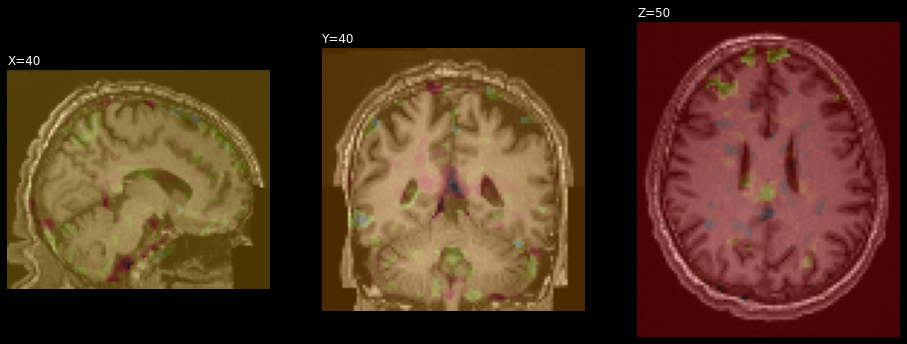

In [62]:
significant_seed1_1 = []
for i in range(120):
  significant_seed1_1.append(np.multiply ( rest.get_fdata()[:,:,:,i] , significant_seed1))

significant_seed1_2 = np.asarray(significant_seed1_1)
significant_seed1_3 = np.einsum('lijk->ijkl', significant_seed1_2)
plot_mp_mri(T1_registerd.get_fdata(), significant_seed1_3 , bold = True,time = 50,slice_num = [40,40,50])

In [63]:
del significant_seed1
del corr_seed1
del significant_seed1_1
del significant_seed1_2
del significant_seed1_3
gc.collect()

4804

## **Percentage of significantly correalted voxels of each segment with Seed 4**

In [64]:
corr_seg = []
for se in range(len(segments)):
  cnt0 = 0
  cnt1 = 0
  for i in range(seed1.shape[0]):
    for j in range(seed1.shape[1]):
      for k in range(seed1.shape[2]):
        x = maskOfseg[i,j,k,se]
        if x == 1:
          if (np.var(rest.get_fdata()[i,j,k,:]) != 0):
            y = np.corrcoef(mean_seed4,rest.get_fdata()[i,j,k,:])[0,1]
            z_score = np.arctanh(y)
            if ( z_score < 0.001):
              cnt1 += 1
            else:
              cnt0 += 1
  if (cnt0 + cnt1) > 0:
    corr_seg.append(cnt1/ (cnt0 + cnt1)*100)
  else:
    corr_seg.append(0)

In [65]:
print("percentage of significantly correlated voxels of each segment with Seed 4 ")
for i in range(len(segments)):
  print(f"Seed 4 and Segment {segments[i]} : {corr_seg[i]}%")

percentage of significantly correlated voxels of each segment with Seed 4 
Seed 4 and Segment 2 : 19.695216049382715%
Seed 4 and Segment 4 : 79.38820101966498%
Seed 4 and Segment 5 : 100.0%
Seed 4 and Segment 7 : 7.37025730484082%
Seed 4 and Segment 8 : 30.08112493239589%
Seed 4 and Segment 10 : 20.5607476635514%
Seed 4 and Segment 11 : 39.381443298969074%
Seed 4 and Segment 12 : 1.4573991031390134%
Seed 4 and Segment 13 : 3.0927835051546393%
Seed 4 and Segment 14 : 26.358695652173914%
Seed 4 and Segment 15 : 88.54166666666666%
Seed 4 and Segment 16 : 25.566874794610584%
Seed 4 and Segment 17 : 22.429906542056074%
Seed 4 and Segment 18 : 5.514705882352941%
Seed 4 and Segment 24 : 57.07547169811321%
Seed 4 and Segment 26 : 14.285714285714285%
Seed 4 and Segment 28 : 24.962630792227205%
Seed 4 and Segment 30 : 0%
Seed 4 and Segment 31 : 93.04347826086956%
Seed 4 and Segment 41 : 21.20487736284928%
Seed 4 and Segment 43 : 75.86466165413533%
Seed 4 and Segment 44 : 0.0%
Seed 4 and Segment 

In [66]:
del corr_seg
gc.collect()

50

# **Seed 5**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


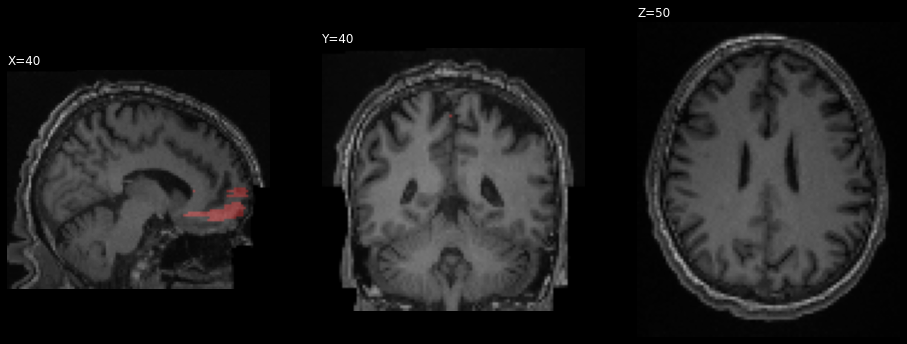

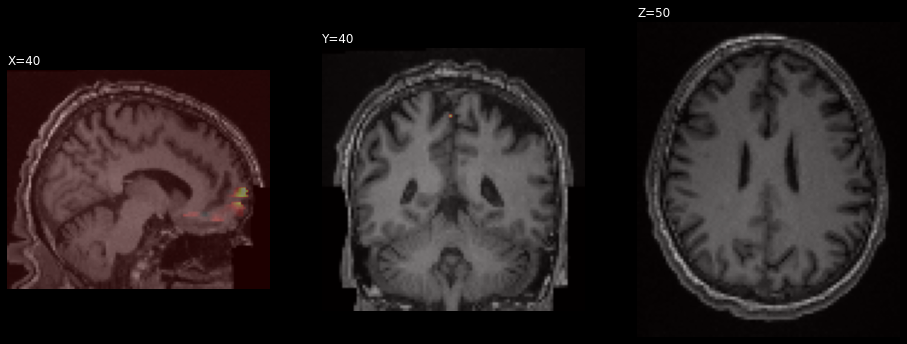

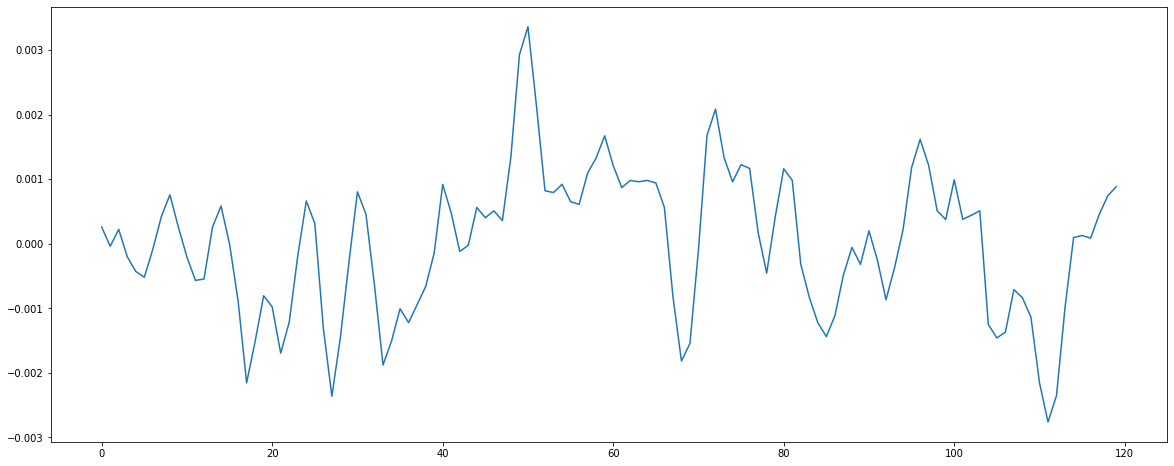

In [67]:
path5 = '/gdrive/MyDrive/mri/seed5.nii'
seed1 = nib.load(path5)

seed1_data = []
for i in range(120):
  seed1_data.append(np.multiply ( rest.get_fdata()[:,:,:,i] , seed1.get_fdata()))

seed1_data1 = np.asarray(seed1_data)
seed1_data2 = np.einsum('lijk->ijkl', seed1_data1)

plot_mp_mri(T1_registerd.get_fdata(), seed1.get_fdata(), bold = False,slice_num = [40,40,50])
plot_mp_mri(T1_registerd.get_fdata(), seed1_data2 , bold = True,time = 50,slice_num = [40,40,50])
plt.figure(figsize = (20,8))
mean_seed5 = []
for i in range(120):
  mean_seed5.append(mean(seed1_data2[:,:,:,i]))
plt.plot(mean_seed5)
plt.show()

In [68]:
del seed1_data
del seed1_data1
del seed1_data2
gc.collect()

12177

## **Volume of Seed 5**

In [69]:
voxel_vol = 1*1*1  
cnt_vxl_seed5 = 0
for i in range(seed1.shape[0]):
   for j in range(seed1.shape[1]):
      for k in range(seed1.shape[2]):
        x = seed1.get_fdata()[i,j,k]
        if (x==1):
          cnt_vxl_seed5 += 1
print(f"Volume of region Seed 5 is: {cnt_vxl_seed4*voxel_vol} mm^3")

Volume of region Seed 5 is: 4702 mm^3


## **Overlap of Seed 5**

In [70]:
union_counter = 0
intersect_counter = 0
overlap_list = []
seed_data = seed1.get_fdata()

for se in range(len(segments)):
  union_counter = 0
  intersect_counter = 0
  for i in range(seed1.shape[0]):
   for j in range(seed1.shape[1]):
      for k in range(seed1.shape[2]):
        if (seed_data[i,j,k] == 1 or maskOfseg[i,j,k,se] == 1  ):
          union_counter+=1
        if (seed_data[i,j,k] == 1 and maskOfseg[i,j,k,se] == 1  ):
          intersect_counter+=1
  overlap_list.append(( intersect_counter /  union_counter )*100)

print("overlap percentage between")
for i in range(len(segments)):
  print(f"Seed 5 and Segment {segments[i]} : {overlap_list[i]}%")

overlap percentage between
Seed 5 and Segment 2 : 0.16967196752944308%
Seed 5 and Segment 4 : 0.0%
Seed 5 and Segment 5 : 0.0%
Seed 5 and Segment 7 : 0.0%
Seed 5 and Segment 8 : 0.0%
Seed 5 and Segment 10 : 0.0%
Seed 5 and Segment 11 : 0.045162018742237776%
Seed 5 and Segment 12 : 0.05397819281010472%
Seed 5 and Segment 13 : 1.4469267276305127%
Seed 5 and Segment 14 : 0.0%
Seed 5 and Segment 15 : 0.0%
Seed 5 and Segment 16 : 0.0%
Seed 5 and Segment 17 : 0.0%
Seed 5 and Segment 18 : 0.0%
Seed 5 and Segment 24 : 0.0%
Seed 5 and Segment 26 : 0.0%
Seed 5 and Segment 28 : 0.0%
Seed 5 and Segment 30 : 0.0%
Seed 5 and Segment 31 : 0.0%
Seed 5 and Segment 41 : 10.191746561067111%
Seed 5 and Segment 43 : 0.23752969121140144%
Seed 5 and Segment 44 : 0.0%
Seed 5 and Segment 46 : 0.0%
Seed 5 and Segment 47 : 0.0%
Seed 5 and Segment 49 : 0.0%
Seed 5 and Segment 50 : 0.13557790080216925%
Seed 5 and Segment 51 : 2.4021352313167257%
Seed 5 and Segment 52 : 0.0%
Seed 5 and Segment 53 : 0.0%
Seed 5 and 

In [71]:
del seed_data
del overlap_list
gc.collect()

50

## **Correlation of Seed 5**

In [72]:
import scipy.stats
significant_seed1 = np.zeros((seed1.shape[0],seed1.shape[1],seed1.shape[2]))
corr_seed1 = np.zeros((seed1.shape[0],seed1.shape[1],seed1.shape[2]))
for i in range(seed1.shape[0]):
   for j in range(seed1.shape[1]):
      for k in range(seed1.shape[2]):
        x = seed1.get_fdata()[i,j,k]
        if (x == 0):
          if (np.var(rest.get_fdata()[i,j,k,:]) != 0):
            corr_seed1[i,j,k] = np.corrcoef(mean_seed5,rest.get_fdata()[i,j,k,:])[0,1]
            z_score = np.arctanh(corr_seed1[i,j,k])
            #p_value = scipy.stats.norm.sf(abs(z_score))*2 #finding p-value
            if ( z_score < 0.001):
              significant_seed1[i,j,k] = 1

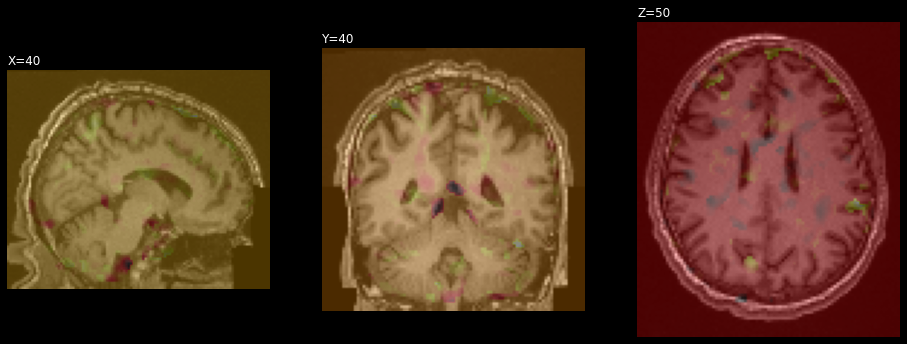

In [73]:
significant_seed1_1 = []
for i in range(120):
  significant_seed1_1.append(np.multiply ( rest.get_fdata()[:,:,:,i] , significant_seed1))

significant_seed1_2 = np.asarray(significant_seed1_1)
significant_seed1_3 = np.einsum('lijk->ijkl', significant_seed1_2)
plot_mp_mri(T1_registerd.get_fdata(), significant_seed1_3 , bold = True,time = 50,slice_num = [40,40,50])

In [74]:
del significant_seed1
del corr_seed1
del significant_seed1_1
del significant_seed1_2
del significant_seed1_3
gc.collect()

4804

## **Percentage of significantly correalted voxels of each segment with Seed 5**

In [75]:
corr_seg = []
for se in range(len(segments)):
  cnt0 = 0
  cnt1 = 0
  for i in range(seed1.shape[0]):
    for j in range(seed1.shape[1]):
      for k in range(seed1.shape[2]):
        x = maskOfseg[i,j,k,se]
        if x == 1:
          if (np.var(rest.get_fdata()[i,j,k,:]) != 0):
            y = np.corrcoef(mean_seed5,rest.get_fdata()[i,j,k,:])[0,1]
            z_score = np.arctanh(y)
            if ( z_score < 0.001):
              cnt1 += 1
            else:
              cnt0 += 1
  if (cnt0 + cnt1) > 0:
    corr_seg.append(cnt1/ (cnt0 + cnt1)*100)
  else:
    corr_seg.append(0)

In [76]:
print("percentage of significantly correlated voxels of each segment with Seed 5 ")
for i in range(len(segments)):
  print(f"Seed 5 and Segment {segments[i]} : {corr_seg[i]}%")

percentage of significantly correlated voxels of each segment with Seed 5 
Seed 5 and Segment 2 : 24.29591049382716%
Seed 5 and Segment 4 : 78.22286962855061%
Seed 5 and Segment 5 : 100.0%
Seed 5 and Segment 7 : 10.423026602703882%
Seed 5 and Segment 8 : 19.004867495943753%
Seed 5 and Segment 10 : 14.018691588785046%
Seed 5 and Segment 11 : 25.36082474226804%
Seed 5 and Segment 12 : 12.331838565022421%
Seed 5 and Segment 13 : 6.958762886597938%
Seed 5 and Segment 14 : 10.326086956521738%
Seed 5 and Segment 15 : 50.520833333333336%
Seed 5 and Segment 16 : 28.9516924088071%
Seed 5 and Segment 17 : 17.133956386292834%
Seed 5 and Segment 18 : 1.8382352941176472%
Seed 5 and Segment 24 : 40.09433962264151%
Seed 5 and Segment 26 : 0.0%
Seed 5 and Segment 28 : 4.185351270553064%
Seed 5 and Segment 30 : 0%
Seed 5 and Segment 31 : 98.26086956521739%
Seed 5 and Segment 41 : 23.187561519455212%
Seed 5 and Segment 43 : 75.63909774436091%
Seed 5 and Segment 44 : 0.0%
Seed 5 and Segment 46 : 12.70072

## **5x5 matrix showing the number of significantly correlated voxels between seeds**

In [ ]:
# seed1 = (nib.load('/gdrive/MyDrive/mri/seed1.nii')).get_fdata()
# seed2 = (nib.load('/gdrive/MyDrive/mri/seed2.nii')).get_fdata()
# seed3 = (nib.load('/gdrive/MyDrive/mri/seed3.nii')).get_fdata()
# seed4 = (nib.load('/gdrive/MyDrive/mri/seed4.nii')).get_fdata()
# seed5 = (nib.load('/gdrive/MyDrive/mri/seed5.nii')).get_fdata()

In [ ]:
# seed_data = []
# for i in range(120):
#   seed_data.append(np.multiply ( rest.get_fdata()[:,:,:,i] , seed1))
# seed_data1 = np.asarray(seed_data)
# seed1_ = np.einsum('lijk->ijkl', seed_data1)

In [ ]:
# seed_data = []
# for i in range(120):
#   seed_data.append(np.multiply ( rest.get_fdata()[:,:,:,i] , seed2))
# seed_data1 = np.asarray(seed_data)
# seed2_ = np.einsum('lijk->ijkl', seed_data1)

In [ ]:
# seed_data = []
# for i in range(120):
#   seed_data.append(np.multiply ( rest.get_fdata()[:,:,:,i] , seed3))
# seed_data1 = np.asarray(seed_data)
# seed3_ = np.einsum('lijk->ijkl', seed_data1)

In [ ]:
# seed_data = []
# for i in range(120):
#   seed_data.append(np.multiply ( rest.get_fdata()[:,:,:,i] , seed4))
# seed_data1 = np.asarray(seed_data)
# seed4_ = np.einsum('lijk->ijkl', seed_data1)

In [ ]:
# seed_data = []
# for i in range(120):
#   seed_data.append(np.multiply ( rest.get_fdata()[:,:,:,i] , seed5))
# seed_data1 = np.asarray(seed_data)
# seed5_ = np.einsum('lijk->ijkl', seed_data1)

In [ ]:
# seeds = [seed1_,seed2_,seed3_,seed4_,seed5_]
# seeds_mask = [seed1,seed2,seed3,seed4,seed5]

In [ ]:
# del seed_data
# del seed_data1
# del seed1
# del seed2
# del seed3
# del seed4
# del seed5
# del seed1_
# del seed2_
# del seed3_
# del seed4_
# del seed5_
# gc.collect()

In [ ]:

# seed_data = seed1.get_fdata()
# SC_matrix = np.zeros((5,5))
# for sd1 in range(len(seeds)-1):
#   for sd2 in range(sd1+1,len(seeds)):
#     cnt_sig = 0
#     cnt_not_sig = 0
#     for i in range(seed1.shape[0]):
#       for j in range(seed1.shape[1]):
#         for k in range(seed1.shape[2]):
#           if seeds_mask[sd1][i,j,k] == 1 and seeds_mask[sd2][i,j,k] == 1:
#             if (np.var(seeds[sd1][i,j,k,:]) != 0 and np.var(seeds[sd2][i,j,k,:]) != 0):
#               y = np.corrcoef(seeds[sd1][i,j,k,:],seeds[sd2][i,j,k,:])[0,1]
#               z_score = np.arctanh(y)
#               if ( z_score < 0.001):
#                 cnt_sig += 1
#               else:
#                 cnt_not_sig += 1
    # if (cnt0 + cnt1) > 0:
    #   SC_matrix[sd1,sd2] = cnt_sig/ (cnt_sig + cnt_not_sig)
    #   SC_matrix[sd2,sd1] = cnt_sig/ (cnt_sig + cnt_not_sig)
    # else:
    #   SC_matrix[sd1,sd2] = 0
    #   SC_matrix[sd2,sd1] = 0
    
